In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
from neural_network import NeuralNetworkModel, ChessDataset, ChessEvaluationNeuralNetwork

In [2]:
df = pd.read_csv("../../data/chess_data.csv")

df = df[~df['Evaluation'].str.contains('#', na=False)]
X = df['FEN'].apply(NeuralNetworkModel.fen_to_feature_array).tolist()
X = np.array(X, dtype=np.float32)
y = df['Evaluation'].apply(lambda x: float(x)).astype(np.float32).values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


train_dataset = ChessDataset(X_train, y_train)
test_dataset = ChessDataset(X_test, y_test)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32)

In [3]:
model = ChessEvaluationNeuralNetwork(input_size=X.shape[1])
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
losses = []

for epoch in range(100):
    model.train()
    running_loss = 0.0
    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()

    print(f"Epoch {epoch+1}, Loss: {running_loss / len(train_loader):.4f}")
    losses.append(running_loss / len(train_loader))

Epoch 1, Loss: 366743.8170
Epoch 2, Loss: 348841.2025
Epoch 3, Loss: 334611.0377
Epoch 4, Loss: 325909.7299
Epoch 5, Loss: 319251.9104
Epoch 6, Loss: 313728.4312
Epoch 7, Loss: 309730.2564
Epoch 8, Loss: 305011.4406
Epoch 9, Loss: 301767.7126
Epoch 10, Loss: 302951.4446
Epoch 11, Loss: 295693.2229
Epoch 12, Loss: 291225.5829
Epoch 13, Loss: 289581.7696
Epoch 14, Loss: 288213.9845
Epoch 15, Loss: 284500.7445
Epoch 16, Loss: 282315.9141
Epoch 17, Loss: 278730.4452
Epoch 18, Loss: 276120.7085
Epoch 19, Loss: 272671.1105
Epoch 20, Loss: 270335.3590
Epoch 21, Loss: 267326.6818
Epoch 22, Loss: 264603.8997
Epoch 23, Loss: 260056.1726
Epoch 24, Loss: 258252.9473
Epoch 25, Loss: 252122.3507
Epoch 26, Loss: 251415.4612
Epoch 27, Loss: 246898.6754
Epoch 28, Loss: 244220.8037
Epoch 29, Loss: 239706.0085
Epoch 30, Loss: 238623.7239
Epoch 31, Loss: 236844.0639
Epoch 32, Loss: 235465.5409
Epoch 33, Loss: 230216.6706
Epoch 34, Loss: 228833.4073
Epoch 35, Loss: 223019.1359
Epoch 36, Loss: 225406.1991
E

In [4]:
model.eval()
test_loss = 0.0
with torch.no_grad():
    for inputs, targets in test_loader:
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        test_loss += loss.item()

avg_test_loss = test_loss / len(test_loader)
rmse_error = np.sqrt(avg_test_loss)
print(f"\nTest RMSE: {rmse_error:.4f}")


Test RMSE: 529.3469


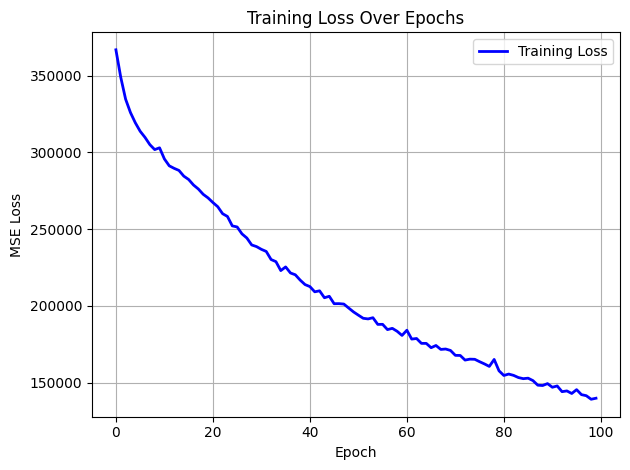

In [5]:
plt.plot(losses, label="Training Loss", color="blue", linewidth=2)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("MSE Loss")
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig("training_loss.png")

In [6]:
torch.save(model.state_dict(), 'neural_network.pth')